In [8]:
%%capture
!pip install pandas-datareader
!pip install yfinance

In [9]:
import pandas as pd 
pd.set_option('display.max_columns', None) # view all columns

import seaborn as sns
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

import matplotlib.pyplot as plt

import numpy as np

import datetime # Using the datetime library
import os
import requests
# from full_fred.fred import Fred
from pandas_datareader import data as web
import yfinance as yf

# Data Gathering
Yahoo Finance Data

https://finance.yahoo.com/commodities/

In [22]:
commodity = {
'GC=F' : 'Gold',
'HG=F' : 'Copper',
'CL=F' : 'Crude Oil Sep 23',
'GD=F' : 'S&P-GSCI Commodity Index Future',
'PL=F' : 'Platinum Oct 23',
'SI=F' : 'Silver',
'HO=F' : 'Heating Oil Aug 23',
'NG=F' : 'Natural Gas Aug 23',
'ZC=F' : 'Corn Futures, Dec-2023',
'ZO=F' : 'Oat Futures, Dec-2023',
'KE=F' : 'KC HRW Wheat Futures, Sep-2023',
'ZR=F' : 'Rough Rice Futures, Sep-2023',
'ZL=F' : 'Soybean Oil Futures, Dec-2023',
'ZS=F' : 'Soybean Futures, Nov-2023',
'HE=F' : 'Lean Hogs Futures, Aug-2023',
'LE=F' : 'Live Cattle Futures, Aug-2023',
'CC=F' : 'Cocoa Sep 23',
'KC=F' : 'Coffee Sep 23',
'CT=F' : 'Cotton Oct 23',
'LBS=F' : 'Random Length Lumber Futures',
'OJ=F' : 'Orange Juice Sep 23',
'SB=F' :'Sugar #11 Oct 23'
}

In [89]:
pd.DataFrame.from_dict(commodity, 
                       orient='index', 
                       columns=['Commodity']).to_csv('commodity_data_description.csv')

In [17]:
print('Now, we have a total of {} commodities in our portfolio.'.format(len(commodity.keys())))

Now, we have a total of 22 commodities in our portfolio.


In [90]:
pd.read_csv('commodity_data_description - Copy.csv')

,S/No,Ticker,Commodity,Datatype,Time Range,Source
0,1,GC=F,Gold,Numeric,January 2018 to December 2022',Yahoo Finance
1,2,HG=F,Copper,Numeric,January 2018 to December 2022',Yahoo Finance
2,3,CL=F,Crude Oil Sep 23,Numeric,January 2018 to December 2022',Yahoo Finance
3,4,GD=F,S&P-GSCI Commodity Index Future,Numeric,January 2018 to December 2022',Yahoo Finance
4,5,PL=F,Platinum Oct 23,Numeric,January 2018 to December 2022',Yahoo Finance
5,6,SI=F,Silver,Numeric,January 2018 to December 2022',Yahoo Finance
6,7,HO=F,Heating Oil Aug 23,Numeric,January 2018 to December 2022',Yahoo Finance
7,8,NG=F,Natural Gas Aug 23,Numeric,January 2018 to December 2022',Yahoo Finance
8,9,ZC=F,"Corn Futures, Dec-2023",Numeric,January 2018 to December 2022',Yahoo Finance
9,10,ZO=F,"Oat Futures, Dec-2023",Numeric,January 2018 to December 2022',Yahoo Finance


In [18]:
commodity.keys()

dict_keys(['GC=F', 'HG=F', 'CL=F', 'GD=F', 'PL=F', 'SI=F', 'HO=F', 'NG=F', 'ZC=F', 'ZO=F', 'KE=F', 'ZR=F', 'ZL=F', 'ZS=F', 'HE=F', 'LE=F', 'CC=F', 'KC=F', 'CT=F', 'LBS=F', 'OJ=F', 'SB=F'])

Downloading the daily data for adjusted close price. The data we acquire is for a 5-year period i.e January 2018 to December 2022.

In [19]:
%%capture

comm_df  = pd.DataFrame()

#Pull the data from Yahoo.Finance

for tick in commodity.keys():
    # Get data from security tickers, 
    comm_df[tick] = yf.download(tick, start = '2018-01-01',end= '2022-12-31')['Adj Close']

In [20]:
comm_df.sample(3)

,GC=F,HG=F,CL=F,GD=F,PL=F,SI=F,HO=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZL=F,ZS=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F,SB=F
Date,,,,,,,,,,,,,,,,,,,,,,
2022-03-31,1949.199951,4.7430,100.279999,725.299988,992.500000,25.121,3.6912,5.642,748.75,727.5,1029.75,1601.0,69.940002,1618.25,101.750000,139.375000,2650.0,226.399994,135.690002,965.299988,151.949997,19.490000
2021-09-23,1747.699951,4.2310,73.300003,546.849976,997.200012,22.642,2.2491,4.976,529.25,580.0,720.00,1383.0,57.099998,1284.25,84.750000,123.224998,2612.0,190.600006,93.309998,638.799988,140.399994,19.490000
2022-06-07,1847.500000,4.4395,119.410004,818.799988,1013.700012,22.159,4.3206,9.293,757.00,668.0,1149.25,1694.0,81.440002,1728.25,108.425003,133.725006,2475.0,232.149994,136.949997,596.799988,183.649994,18.969999


In [21]:
comm_df.shape

(1258, 22)

Now we have a dataframe which consists of 1258 entries for 22 commodities.

In [23]:
comm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-02 to 2022-12-30
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    1258 non-null   float64
 1   HG=F    1258 non-null   float64
 2   CL=F    1258 non-null   float64
 3   GD=F    1079 non-null   float64
 4   PL=F    1243 non-null   float64
 5   SI=F    1258 non-null   float64
 6   HO=F    1258 non-null   float64
 7   NG=F    1258 non-null   float64
 8   ZC=F    1256 non-null   float64
 9   ZO=F    1258 non-null   float64
 10  KE=F    1258 non-null   float64
 11  ZR=F    1246 non-null   float64
 12  ZL=F    1258 non-null   float64
 13  ZS=F    1258 non-null   float64
 14  HE=F    1254 non-null   float64
 15  LE=F    1258 non-null   float64
 16  CC=F    1258 non-null   float64
 17  KC=F    1258 non-null   float64
 18  CT=F    1258 non-null   float64
 19  LBS=F   1258 non-null   float64
 20  OJ=F    333 non-null    float64
 21  SB=F    1258 non-nu

# Data Cleaning

As a result of several missing variables for GD=F and OJ=F, we consequently drop them. After this, we drop other missing values.

In [27]:
comm_df = comm_df.drop(['OJ=F', 'GD=F'], axis = 1)

In [29]:
print('Now, we have a total of {} commodities in our portfolio.'.format(comm_df.shape[1]))

Now, we have a total of 20 commodities in our portfolio.


In [31]:
comm_df = comm_df.dropna()

In [32]:
comm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1225 entries, 2018-01-02 to 2022-12-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    1225 non-null   float64
 1   HG=F    1225 non-null   float64
 2   CL=F    1225 non-null   float64
 3   PL=F    1225 non-null   float64
 4   SI=F    1225 non-null   float64
 5   HO=F    1225 non-null   float64
 6   NG=F    1225 non-null   float64
 7   ZC=F    1225 non-null   float64
 8   ZO=F    1225 non-null   float64
 9   KE=F    1225 non-null   float64
 10  ZR=F    1225 non-null   float64
 11  ZL=F    1225 non-null   float64
 12  ZS=F    1225 non-null   float64
 13  HE=F    1225 non-null   float64
 14  LE=F    1225 non-null   float64
 15  CC=F    1225 non-null   float64
 16  KC=F    1225 non-null   float64
 17  CT=F    1225 non-null   float64
 18  LBS=F   1225 non-null   float64
 19  SB=F    1225 non-null   float64
dtypes: float64(20)
memory usage: 201.0 KB


# Exploratory Data Analysis

Now we visualize the time series as needed.

1. Histogram plot

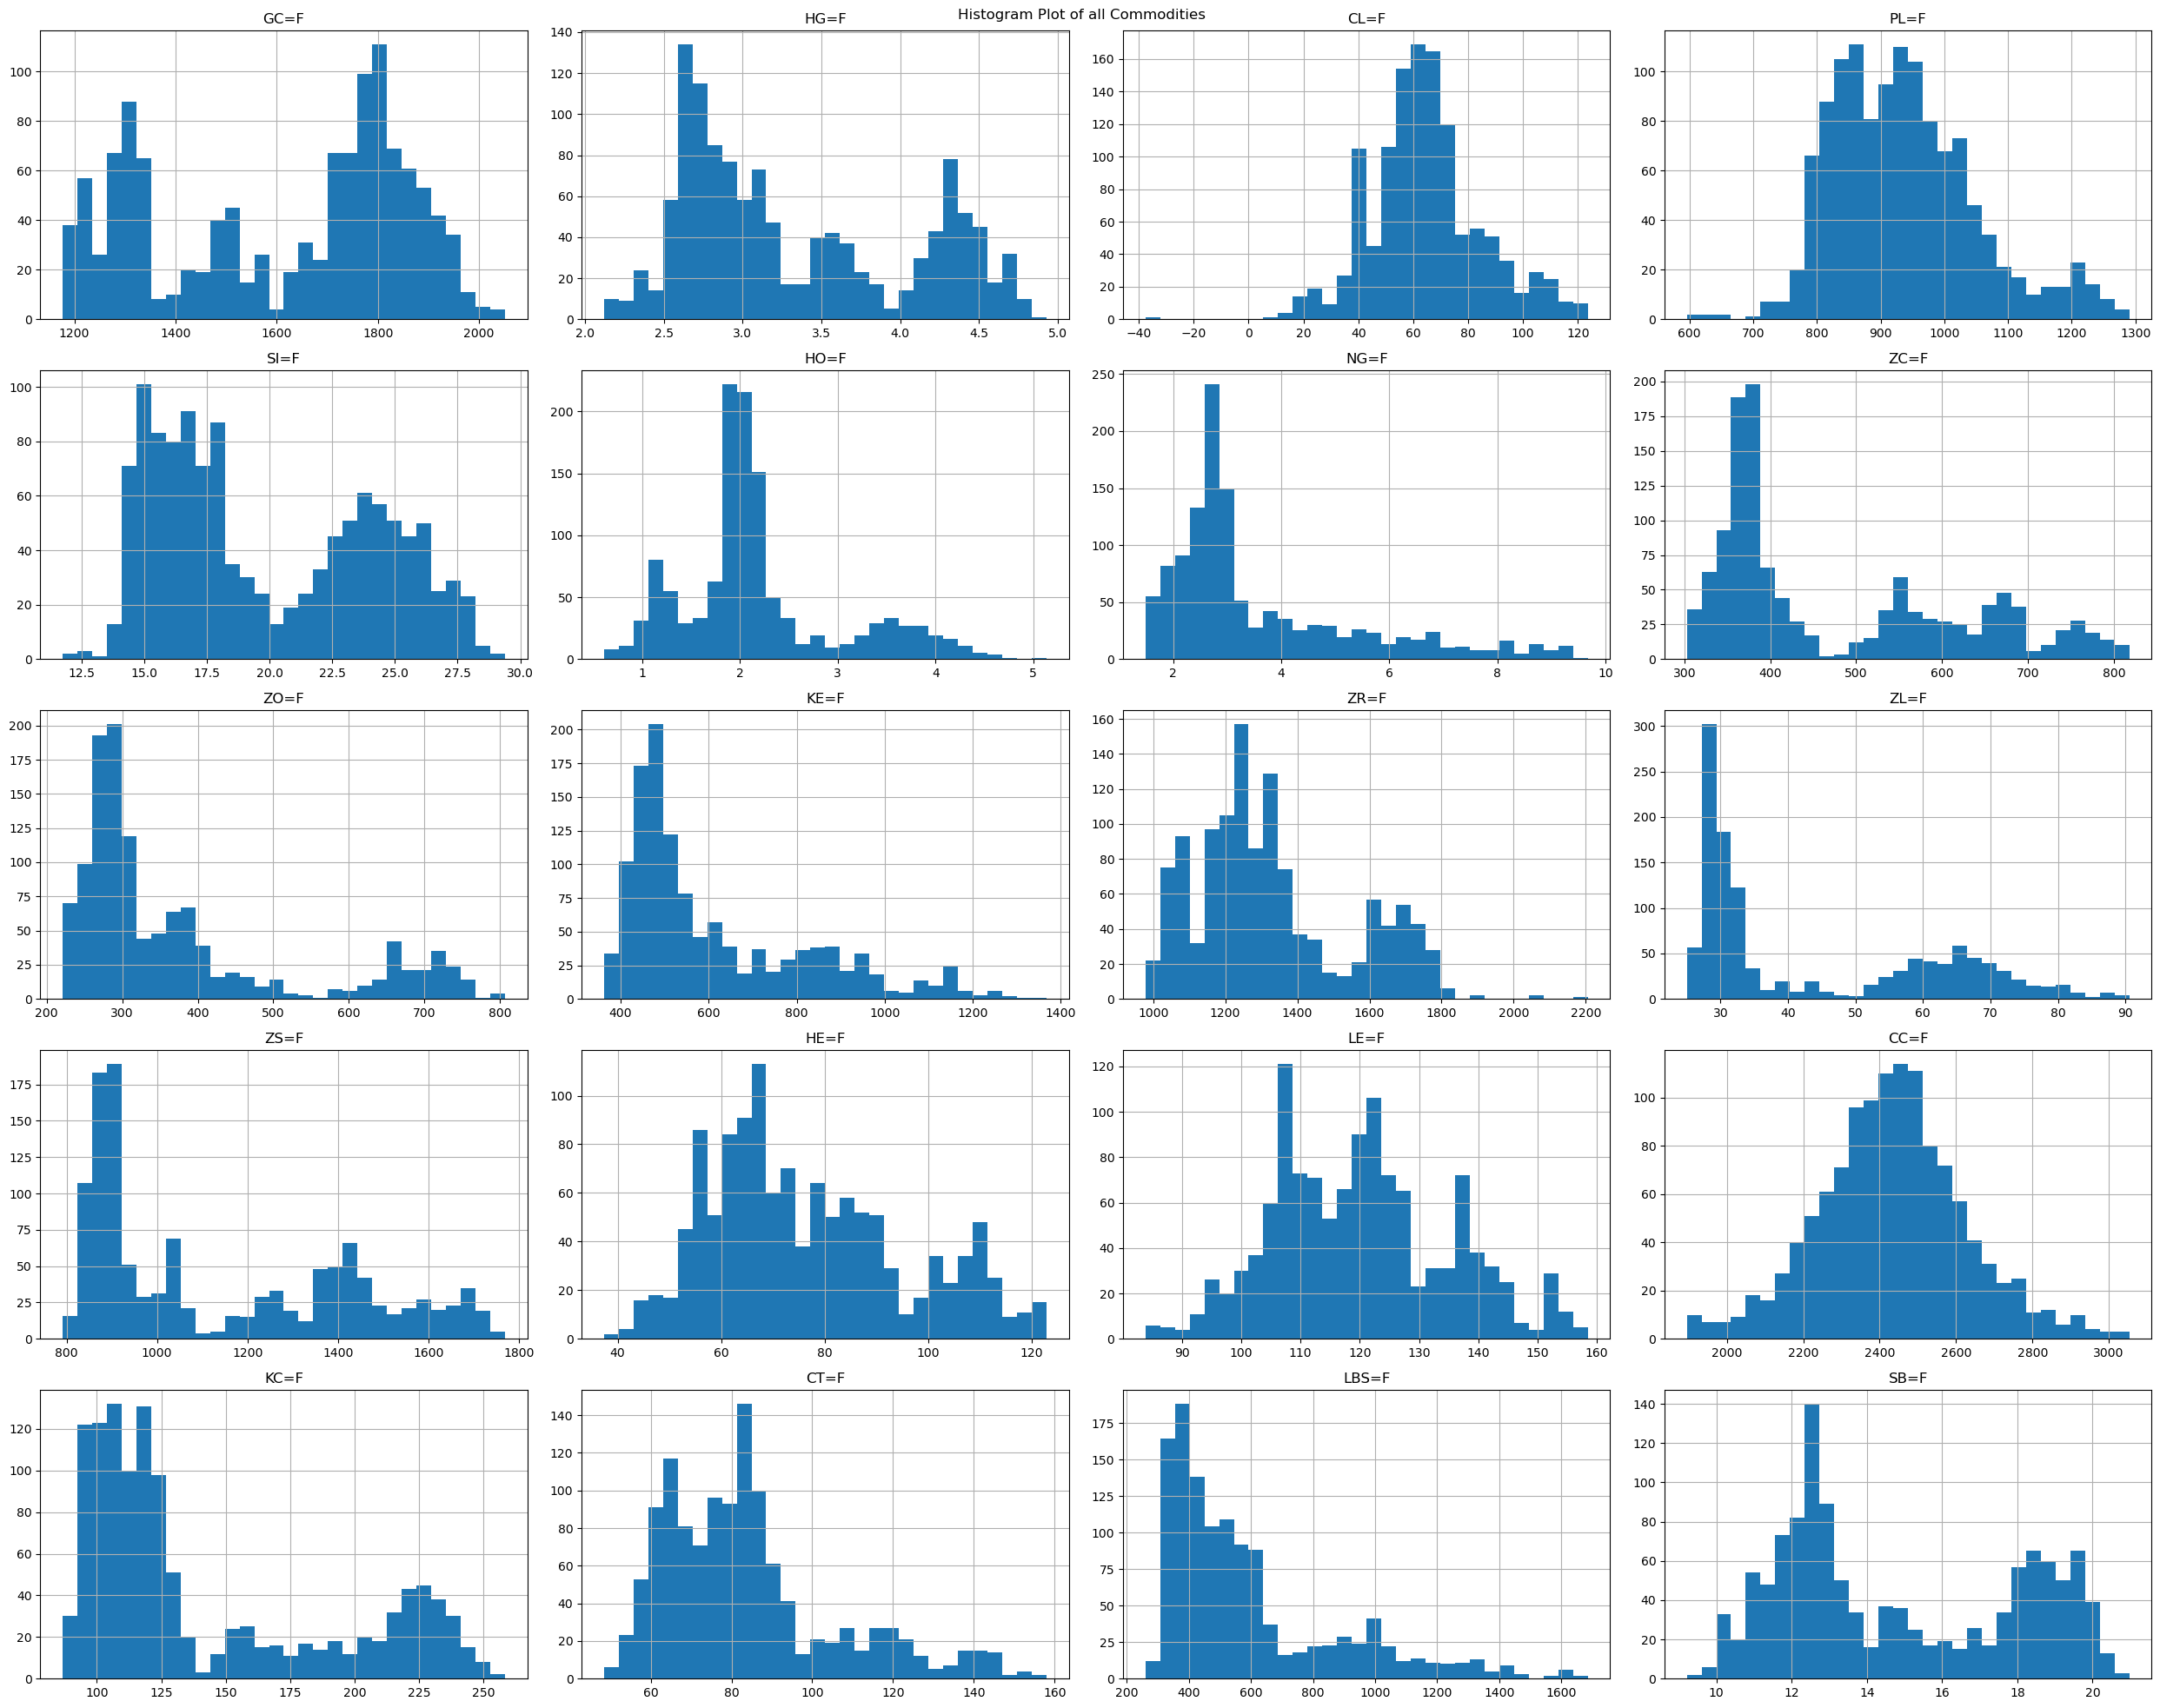

In [34]:
comm_df.hist(figsize=(25, 20), bins = 30 )
plt.suptitle('Histogram Plot of all Commodities')
plt.tight_layout()
plt.show()

The distributions here are quite interesting. For instance:
- Crude Oil Sep 23 i.e CL=F and Cocoa (CC=F),  has an almost normal distribution.
- Platinum Oct 23 (PL=F), Coffee (KC=F) are bimodal.
- Natural Gas (NG=F), Corn Futures (ZC=F), Oat (ZO=F), Wheat (KE=F), Soybean Oil (ZL=F), Soybean (ZS=F), Coffee (KC=F) are all skewed to the right.

2. Timeseries plot.

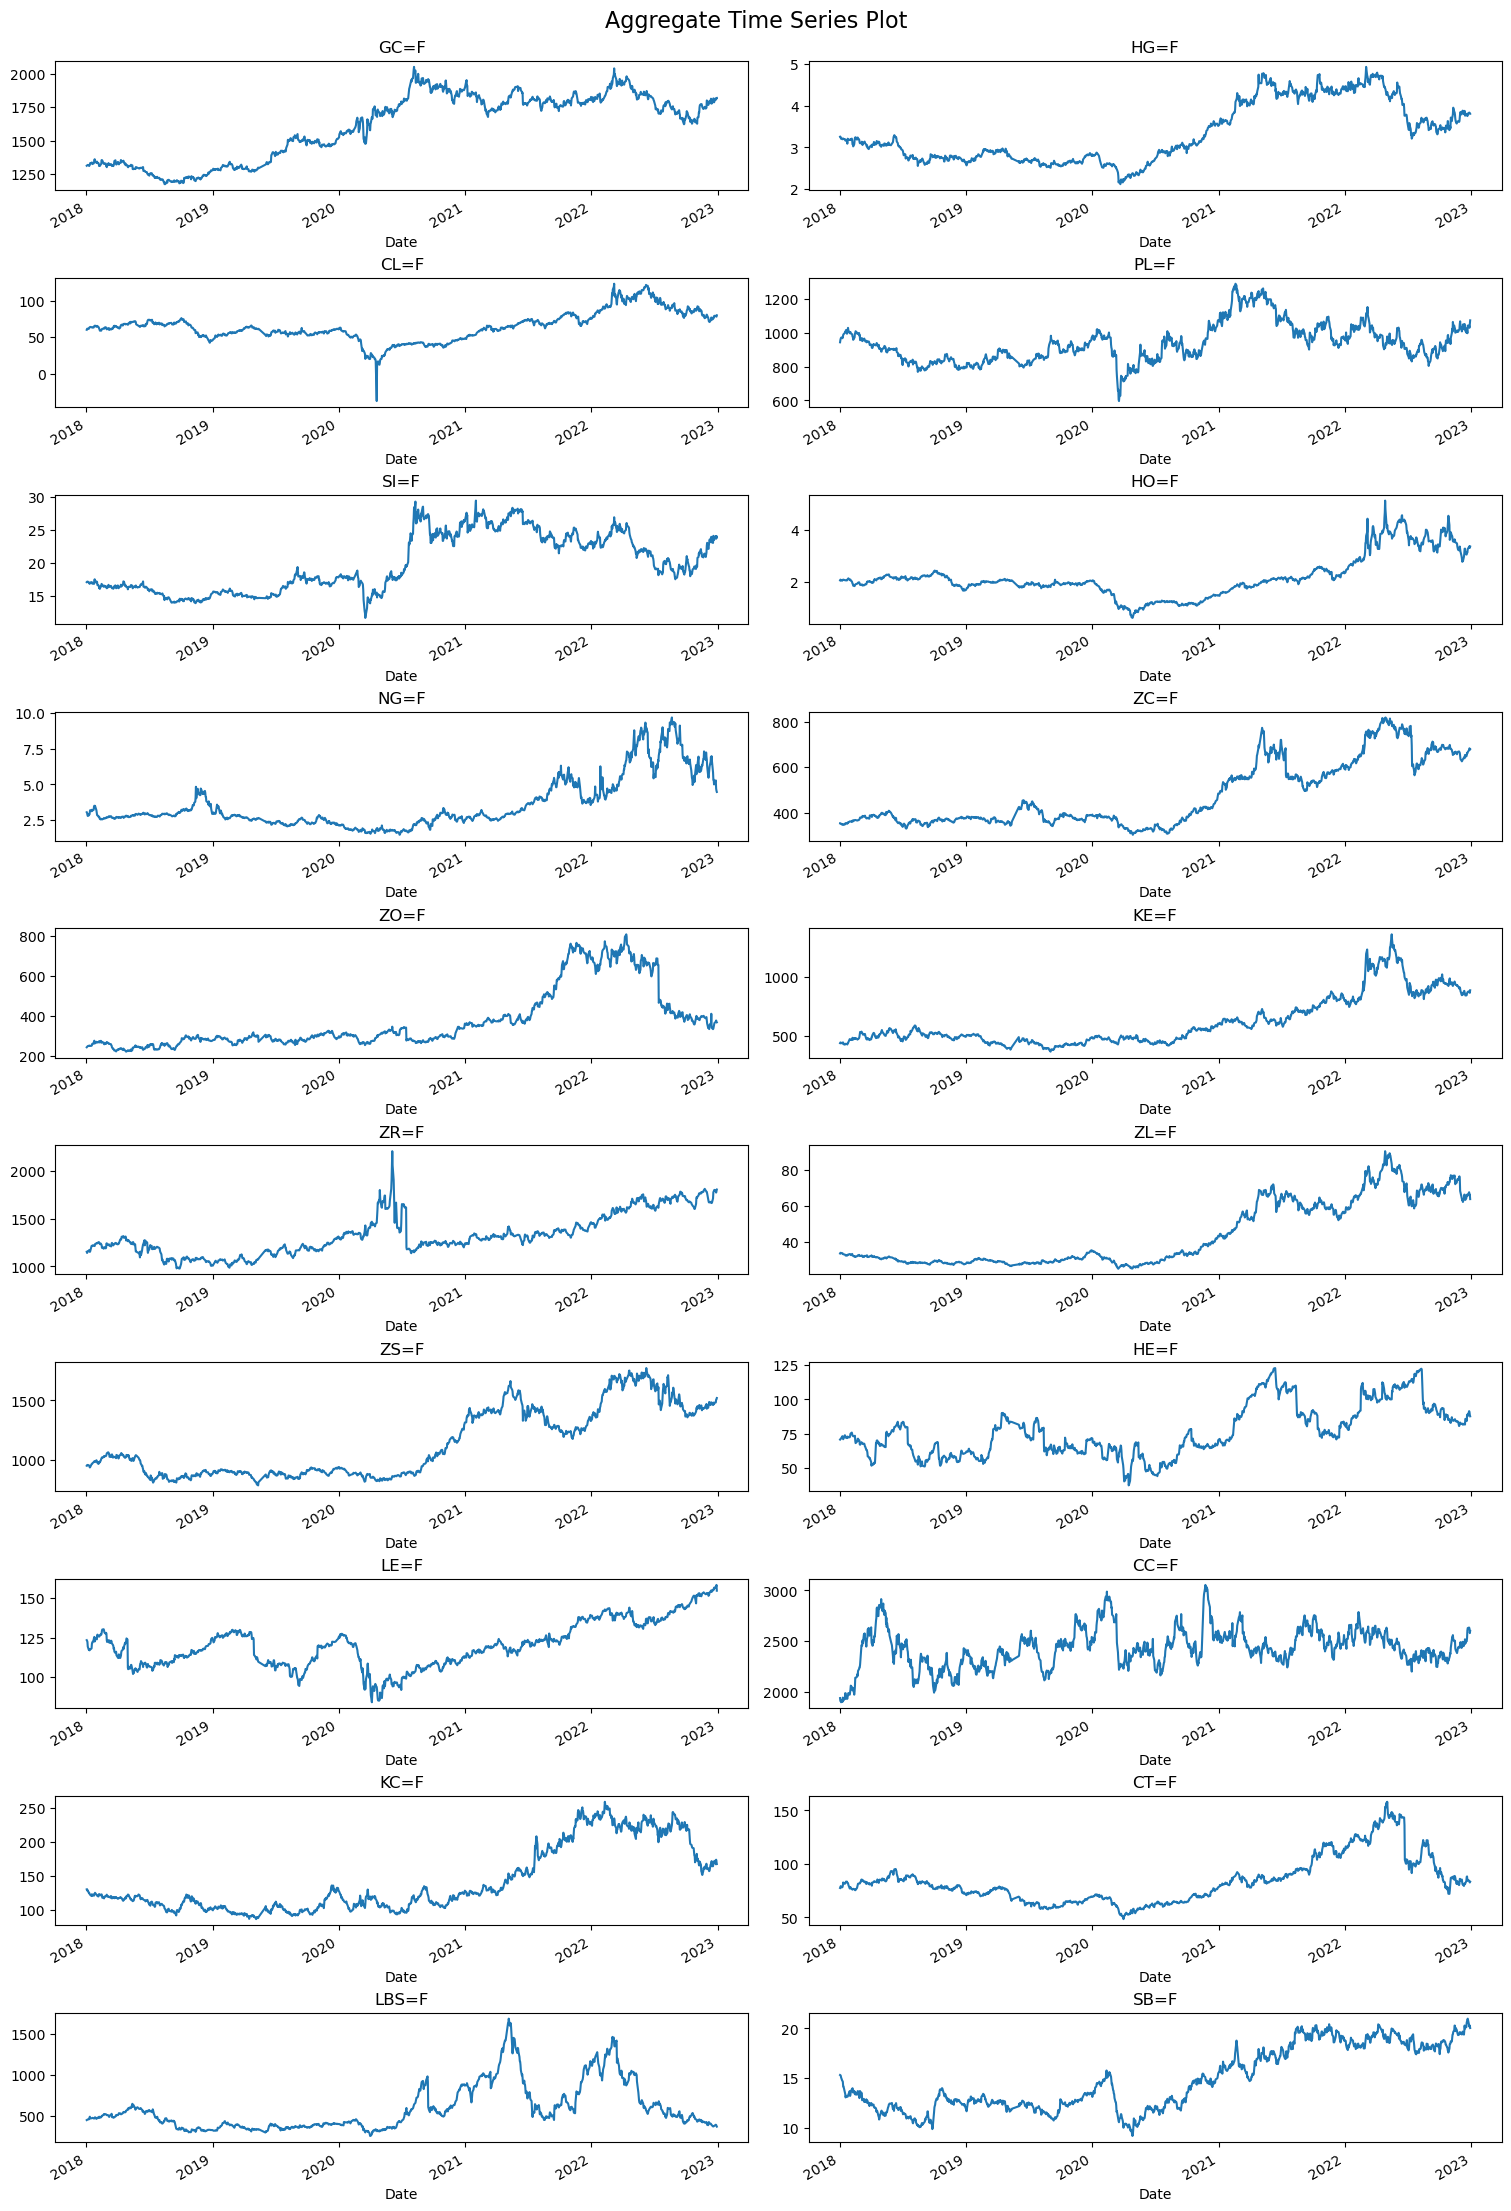

<Figure size 3000x2000 with 0 Axes>

In [43]:
nrow=10
ncol=2
fig, axes = plt.subplots(nrow, ncol, layout='constrained')

count=0
plt.figure( figsize = (30,20) )
fig.suptitle('Aggregate Time Series Plot', fontsize=16)
for r in range(nrow):
    for c in range(ncol):
        comm_df.iloc[:,count].plot(ax=axes[r,c], 
                                       figsize= (15,22),
                                       title = comm_df.iloc[:,count].name
                                        )
        count+=1


# plt.tight_layout()
plt.show();

The plot above shows the trend in the time series. Evident in this plot are seasonality and spikes.

3. Correlation plot.

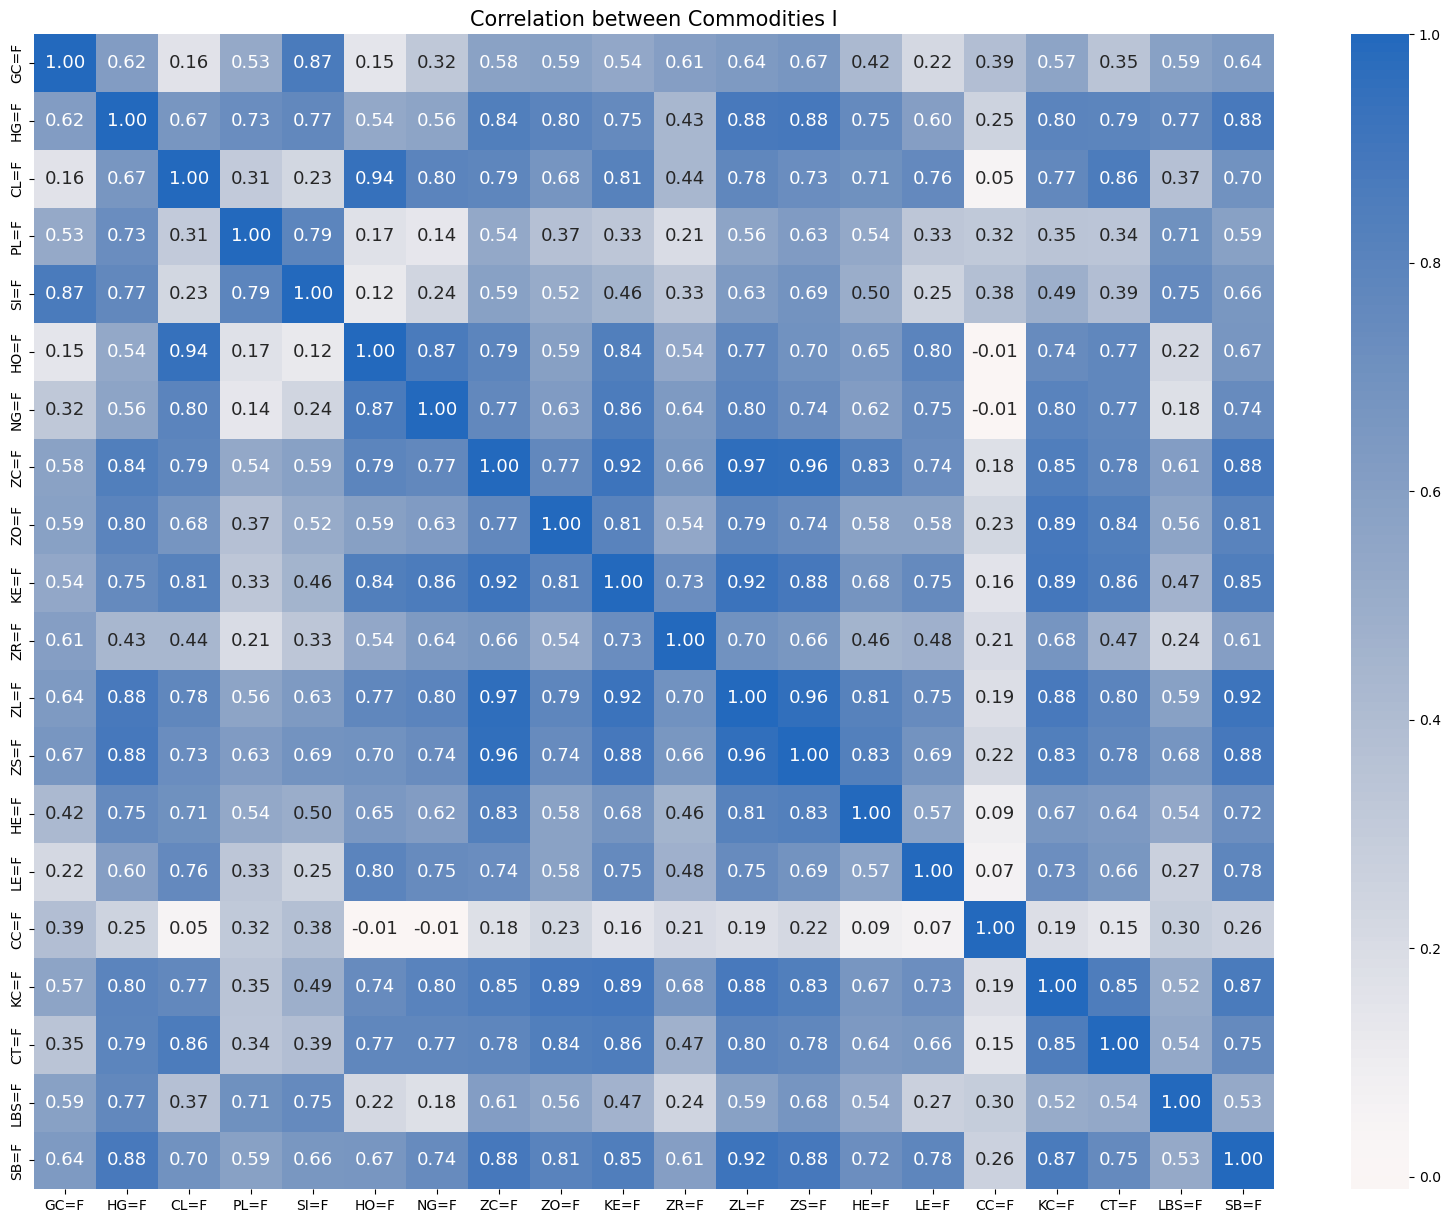

In [63]:
# correlation plot
plt.figure(figsize = [20, 15])
sns.heatmap(comm_df.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, annot_kws={"size":13})
plt.title('Correlation between Commodities I', fontsize = 15)
plt.show()

At this point, we can go a step further in our data cleaning by removing highly correlating commodities. For instance, if commodity A and B are positively correlated with $\rho \geq 0.85$, we remove A leaving B or vice versa. 

Remove highly correlating Variables

In [56]:
# calculate correlation matrix
corr_matrix = comm_df.corr().abs()

# corr_matrix

In [57]:
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [58]:
# find features with correlation greater than 0.85

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [59]:
to_drop

['SI=F', 'HO=F', 'NG=F', 'KE=F', 'ZL=F', 'ZS=F', 'KC=F', 'CT=F', 'SB=F']

verdict: no highly correlating columns

In [60]:
comm_df_no_corre = comm_df.drop(to_drop, axis = 1)

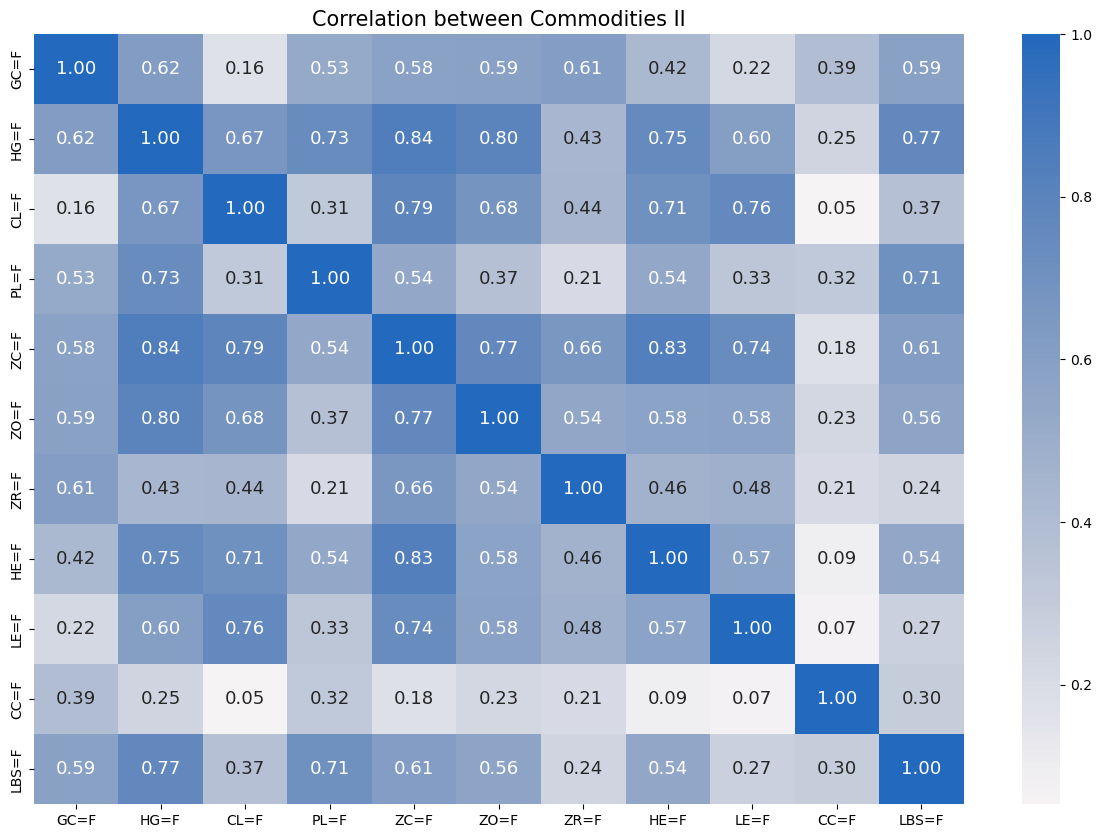

In [64]:
# correlation plot
plt.figure(figsize = [15, 10])
sns.heatmap(comm_df_no_corre.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, annot_kws={"size":13})
plt.title('Correlation between Commodities II', fontsize = 15)
plt.show()

In [92]:
comm_df_no_corre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1225 entries, 2018-01-02 to 2022-12-30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    1225 non-null   float64
 1   HG=F    1225 non-null   float64
 2   CL=F    1225 non-null   float64
 3   PL=F    1225 non-null   float64
 4   ZC=F    1225 non-null   float64
 5   ZO=F    1225 non-null   float64
 6   ZR=F    1225 non-null   float64
 7   HE=F    1225 non-null   float64
 8   LE=F    1225 non-null   float64
 9   CC=F    1225 non-null   float64
 10  LBS=F   1225 non-null   float64
dtypes: float64(11)
memory usage: 114.8 KB


The new look data with just 11 variables will be used to build our portfolio after accounting for highly correlating variables.

## Computation of the returns on an asset and portfolio

We make a return as the percentage change in the closing price of the asset over the previous day’s closing price. We will compute the returns using .pct_change() function in python. Then take the log difference of the percentage returns.

In [94]:
comm_df_ret = comm_df.copy()

#find % difference and log difference
comm_df_ret = comm_df_ret.pct_change().apply(lambda x: np.log(1+x))

C:\Users\oluse\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [96]:
comm_df_ret = comm_df_ret.dropna()
comm_df_ret.head()

,GC=F,HG=F,CL=F,PL=F,SI=F,HO=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZL=F,ZS=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,SB=F
Date,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.001901,-0.005852,0.020657,0.014725,0.003731,0.014278,-0.015831,-0.000708,0.008214,0.014274,-0.010896,0.011320,0.004961,0.004585,-0.003248,-0.015093,-0.012365,0.007840,0.005943,-0.001305
2018-01-04,0.002428,0.001698,0.006147,0.008628,0.000233,-0.005282,-0.043485,-0.005682,0.005099,-0.002838,0.005681,-0.000592,-0.000521,0.004564,-0.005710,-0.001049,0.007360,0.014489,0.002411,-0.003927
2018-01-05,0.000682,-0.011009,-0.009235,0.005265,0.000930,-0.008850,-0.029958,0.000712,0.011128,-0.005130,0.007813,-0.002671,0.002343,0.000700,-0.024846,-0.005263,-0.008527,-0.015770,0.009803,-0.011210
2018-01-08,-0.001288,-0.001873,0.004709,0.001132,-0.008229,-0.006481,0.014210,-0.011453,0.006018,-0.009762,0.006894,-0.006559,-0.003386,0.021469,-0.017127,0.009976,-0.026027,0.001665,0.001516,-0.020094
2018-01-09,-0.005247,-0.002033,0.019730,-0.004536,-0.007529,0.010118,0.030569,0.005027,-0.004008,0.013184,0.005566,0.003583,-0.002612,0.002737,0.003831,-0.007868,0.000000,0.002684,0.020354,-0.003389


Annualized variance per asset.

In [97]:
comm_df_ret.var()*365.25

GC=F     0.034653
HG=F     0.079439
CL=F     0.432738
PL=F     0.136859
SI=F     0.145921
HO=F     0.267175
NG=F     0.637054
ZC=F     0.116855
ZO=F     0.222076
KE=F     0.169737
ZR=F     0.109140
ZL=F     0.107551
ZS=F     0.068699
HE=F     0.328038
LE=F     0.059837
CC=F     0.124498
KC=F     0.175794
CT=F     0.135273
LBS=F    0.495408
SB=F     0.113011
dtype: float64

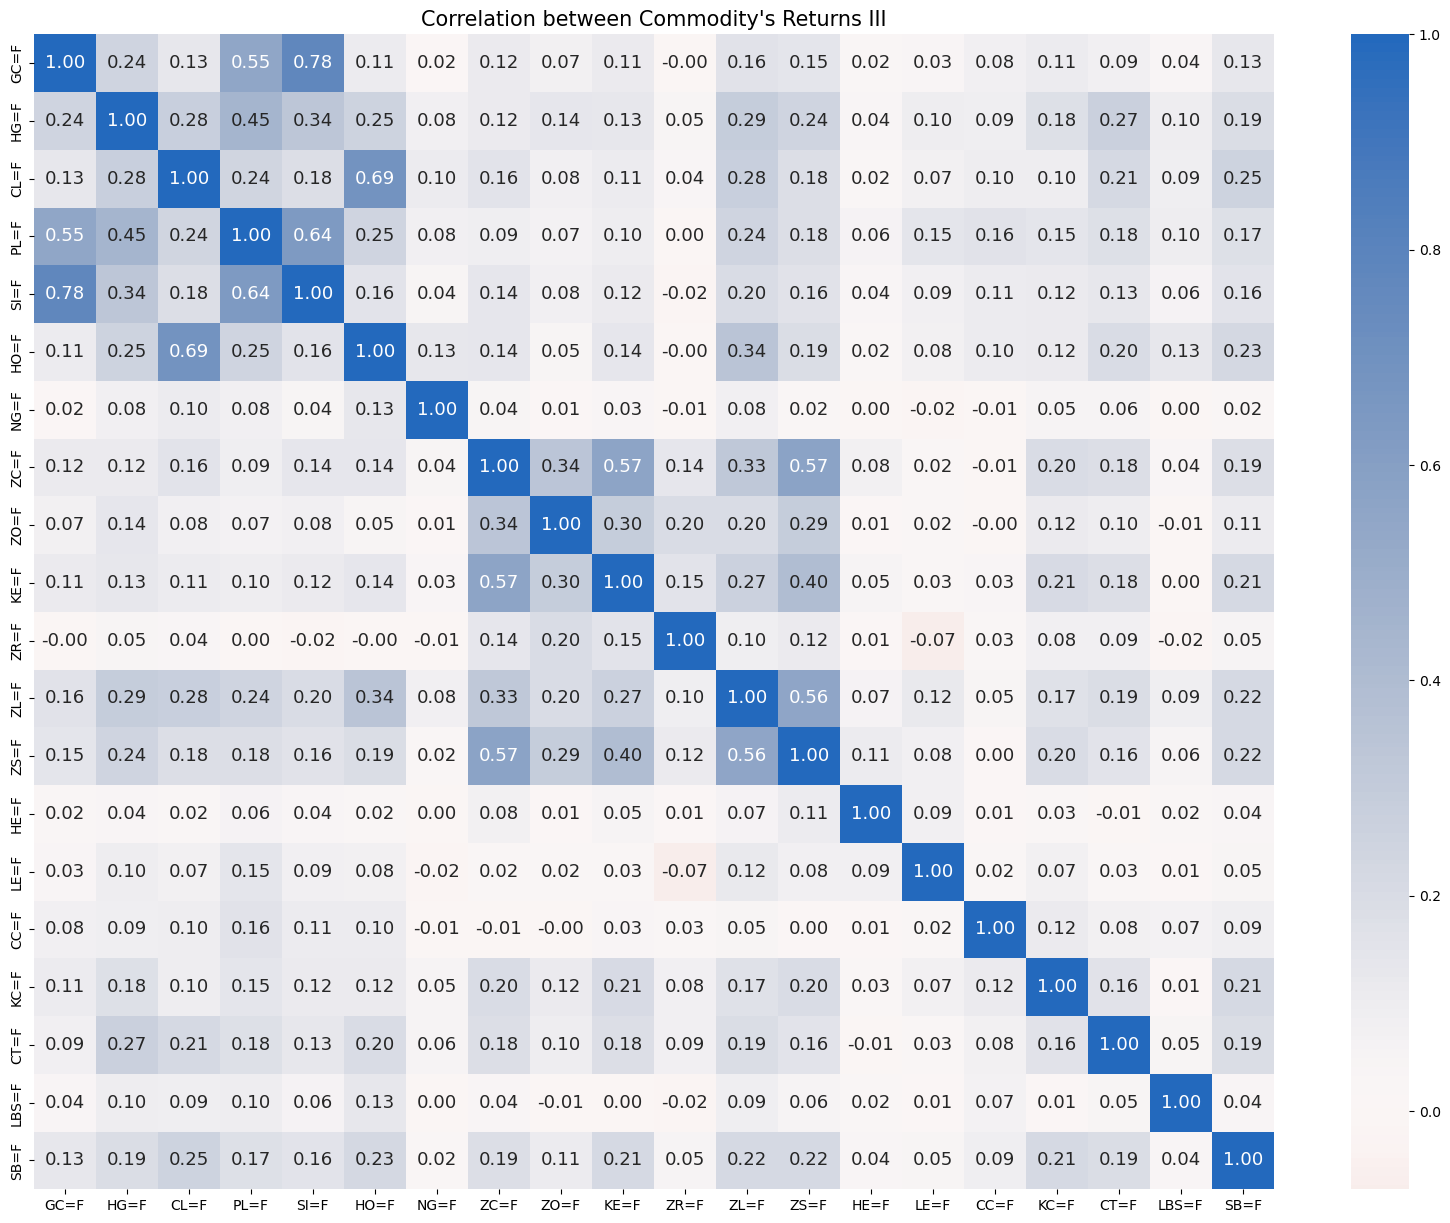

In [104]:
# correlation plot
plt.figure(figsize = [20, 15])
sns.heatmap(comm_df_ret.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, annot_kws={"size":13})
plt.title("Correlation between Commodity's Returns III", fontsize = 15)
plt.show()

From the above, we notice that there are instances of high correlation for returns between the following commodities:
- SI=F and GC=F, 0.78
- CL=F and HO=F, 0.69
- PL=F and SI=F, 0.64

Every other relationship are either weak positively correlated or no correlation at all.

# Portfolio build

Our capital is 10m USD which we shall equally share among the 20 assets respectively with weight 1/20.

In [116]:
1e7

10000000.0

In [114]:
capital, weight = 1e7, 1/20
print("Capital is {} USD and weight is {} per commodity in the portfolio.".format(capital, weight))

Capital is 10000000.0 USD and weight is 0.05 per commodity in the portfolio.


In [115]:
fund_allocation = [capital * weight] * 20
print(fund_allocation)

[500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0]


Consequently, we have 500,000 USD per asset in the portfolio.

# Risk Management

Next Step:
Validate the portfolio risk using the following Value-at-Risk approaches:
1. Variance/Covariance
2. Monte Carlo
3. Historical Simulation

Finally, calculate the Expected Shortfall (ES) and perform a backtest for these risk measures. We shall use a rolling window for this backtest which takes in the later 20% of the data.